## Tensorflow Neural Networks (Part # 01):

We have already learned about the Tensorflow Sessions, Graphs, Variables and Placeholders, and also implemented the using general Python script. Now let's go ahead and create a Neural Network with these building blocks in Tensorflow.

We'll start off by creating a Neuron essentially and once we understood how this is done, we'll eventually move on to creating a fully multi layer Neural Network later.

We'll first create a Neuron that performs a very simple Linear fit to some 2-D data, i.e we're gonna have some features and we'll predict 'y' on the basis of given features. Our steps would be the following:

* Build a Graph
* Initiate a Session
* Feed data in and get the Output

Again, we'll be using the basic built-in Tensorflow components, such as **Placeholders**, **Variables** etc and our __Graph__ will implement the following equation.

__W (variable) * X (placeholder) --> [tf.matmul()] --> [tf.add()] + Biase (variable) --> [Activation Function]__

Afterwards we can add in the __Cost function__ in order to train our network to optimize the Parameters.

So, LET'S GO AND BUILT THIS NEURAL NETWORK!

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a.shape

(5, 5)

In [4]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [6]:
# CREATING PLACEHOLDERS FOR RANDOM SEED OBJECTS!

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [7]:
add_op = a + b # just for testing

mul_op = a * b # just for testing

In [8]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op, feed_dict = {a: 10, b: 20})
    print(add_result)

30.0


In [9]:
with tf.Session() as sess:
    
    multiply_result = sess.run(mul_op, feed_dict = {a: rand_a, b: rand_b})
    print(multiply_result)

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Example Neural Network:

Above, we just created a simple Session graph. Now we'll go through a very simple example of the Neural Network to kind of get the flow. Then after that we're gonna create a full Network example. We'll create some artificial data that does follow some sort of __Linear__ trend. And then we're gonna create a Neural Network that solve the **Regression** problem with a **Cost** function and **Optimizers**.

So, let's go ahead and build it.

In [10]:
n_features = 10
n_dense_neurons = 3

In [11]:
x = tf.placeholder(tf.float32, shape = (None, n_features)) # shape: rows / batch_size -> None, columns -> n_features

In [12]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons])) # initialize the Weights with random normal distribution

b = tf.Variable(tf.ones([n_dense_neurons]))

In [13]:
xW = tf.matmul(x,W) # multiplying 'x' with 'W'

In [14]:
z = tf.add(xW, b) # adding bisaes the the product

In [15]:
# Finally we wanna pass it to some sort of activation function

activation = tf.sigmoid(z)

In [16]:
# Initializing the Session

init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    
    sess.run(init)
    
    outer_layer = sess.run(activation, feed_dict = {x: np.random.random([1, n_features])})

In [18]:
print(outer_layer)

[[0.19592889 0.8423014  0.36188066]]


## Regression Example:

Now that we have done all the process of creating a simple Neural Network, it's showing some weird results. This is because we have initialized our **Weights** with a randome values, and we're adding a constant __biase__ term to our output product. That's partially how a Neural Network work.

In order to make it work best, we need to update the __weights__ comparing it to some __cost__ function after every single iteration.

so, let's go ahead, and now work through some more realistic example of some __Regression__

In [19]:
# creating data and adding some noise to it

x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [20]:
z = np.random.uniform(-1.5, 1.5, 10)

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

(array([2., 2., 2., 0., 0., 0., 0., 2., 1., 1.]),
 array([-1.36980992, -1.17862559, -0.98744127, -0.79625695, -0.60507263,
        -0.41388831, -0.22270398, -0.03151966,  0.15966466,  0.35084898,
         0.5420333 ]),
 <a list of 10 Patch objects>)

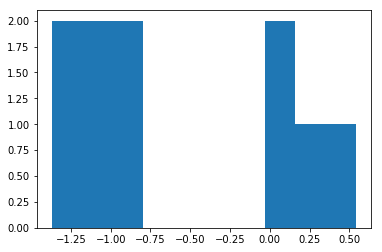

In [22]:
plt.hist(z)

In [23]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [24]:
# attaching labels to the data points

y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

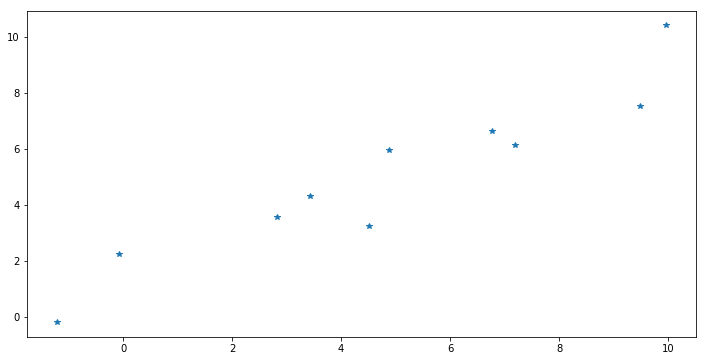

In [25]:
# seems like some sort of linear data we needed, with noise added!
plt.figure(figsize = (12,6))
plt.plot(x_data, y_label, '*')

## Creating a Neural Network:

Now that we have our noisy data, that shows some sort of Linear trend, we're ready to create a Neural Network to feed in our data we just created!

Remember! we'll initialize our data will complete random values of __weights__ and __biases__ and it'll be upto our model to see the observe the patterns and try to come up with best fit.

__y = mx + b__

In [26]:
np.random.rand(2)

array([0.81226589, 0.67026042])

In [27]:
# Initializing weights and biases with Random values

m = tf.Variable(0.20)

b = tf.Variable(0.71)

In [28]:
# Creating a cost function

error = 0

for x,y in zip(x_data, y_label):
    
    y_hat = m*x + b
    
    error += (y-y_hat) ** 2

In [29]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.001) # set the learning rate = 0.001
train = optimizer.minimize(error) # minimize the error variable we created above

W0820 11:39:12.865235 139897314977600 deprecation.py:323] From /home/umairshah/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
# Creating global initializer

init = tf.global_variables_initializer()

In [41]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 1
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m, b])

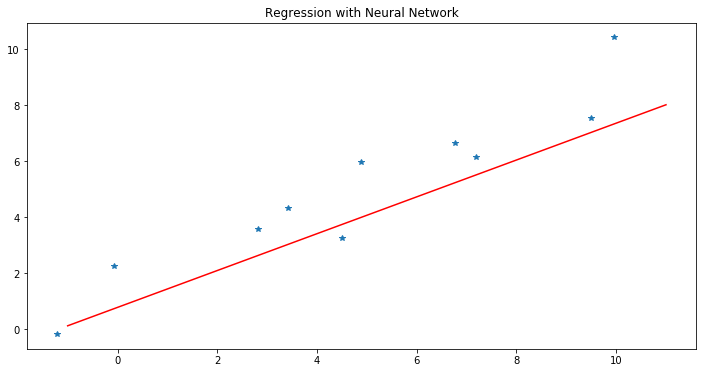

In [42]:
# Now let's test the performance of our model. I would expect it to be poor, cuz we're training our data 
# on only 1 training iteration!

x_test = np.linspace(-1, 11, 10)

# y  = mx + b

y_pred_plot = final_slope * x_test + final_intercept

plt.figure(figsize = (12,6))
plt.title('Regression with Neural Network')
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')